<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch08_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch08 - TP : Modèle "SIR" pour la propagation des épidémies**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Présentation**

Les modélisations jouent un rôle primordial dans l'étude des phénomènes dynamiques, et permettent d'orienter les décisions, qu'elles soient sanitaires, économiques, politiques, etc.

**"SIR"** est un de ces modèles, destinés à simuler des propagations épidémiques. Il s'agit d'un modèle "à compartiments", c'est-à-dire que la population est compartimentée en diverses catégories, dont l'évolution s'opère de manière conjointe. Datant de 1927, et très simple, voire simpliste (rappeler qu'il ne s'agit que de simulations !!!), il reste assez fidèle. 



On observe la taille de trois sous-populations en fonction du temps t :     
* **"S(t)"** : les personnes saines et Suceptibles (*Suceptible in english*) d'être infectées
* **"I(t)"** : les personnes Infectées (*Infected*)
* **"R(t)"** : les personnes Retirées (rétablies, donc immunisées... ou décédées : *Removed*)

On notera N la population totale, considérée comme constante, on a donc :     
**N = S(t) + I(t) + R(t)**

D'autres variantes viennent améliorer le modèle SIR : par exemple, en introduisant la vaccination, on fait passer une part de la population directement de la catégorie S à la catégorie R. La quarantaine, la distanciation sociale, le confinement viennent modifier les taux de contamination.

**source :** pour de plus amples informations, http://images.math.cnrs.fr/Modelisation-d-une-epidemie-partie-1.html 

## **Modélisation mathématique**

Notons :    
* $\beta$ le taux de transmission par contact, c'est-à-dire le taux de personnes saines qui deviennent infectées, il faut pour cela qu'elles rencontrent une personne infectée (considérée comme contagieuse).

* $\gamma$ le taux de guérison, c'est-à-dire le taux de personnes infectées qui deviennent retirées.

Les trois catégories de population sont alors régies par le système différentiel suivant :

$\left\{\begin{matrix}
\frac{dS(t)}{dt} & = & \frac{-\beta S(t).I(t)}{N} \\
\frac{dI(t)}{dt} & = & \frac{\beta S(t).I(t)}{N}  - \gamma I(t)\\
\frac{dR(t)}{dt} & = & \gamma I(t)
\end{matrix}\right.$

**Interprétation :**

Les $\frac{d}{dt}$ désigne les variations des diverses quantités en fonction du temps (dérivées quand l'intervalle de temps tend vers 0)

$S(t).I(t)$ représente le nombre de rencontres entre une personne saine et une personne infectée. Multiplié par le taux d'infection, on obtient donc le nombre de personnes qui quittent la catégorie S pour se retrouver dans la catégorie I (en moins d'un côté, en plus de l'autre).

Parmi les personnes infectées, un certain nombre passent en catégorie R, dépendant du taux de guérison (ce nombre est compté en moins dans la catégorie I, et en plus dans la catégorie R).

En complément, on entend parler du fameux **taux de reproduction** $R_0$ : il s'agit du nombre moyen d'infections secondaires produits par un individu infectieux, le temps de son infection. Au début de l'épidémie, on $R_0 = \frac{\beta}{\gamma}$, puisque $ \frac{1}{\gamma}$ représente la durée moyenne de la maladie, et qu'au début, les personnes rencontrées sont presque toutes saines.

La propagation de l'épidémie est une réaction en chaîne, c'est pourquoi on cherche par tous les myens à faire baisser ce $R_0$.

## **Programme**

Le code suivant résout le système différentiel, grâce à la fonction *OdeInt* du module *SciPy.Integrate*, avec 
* $\beta = 0.2$, 
* $\frac{1}{\gamma} = 10$ jours
* N = 1000.

On démarre la simulation avec un seul individu infecté : $I_0 = 1$ et aucune personne retirée : $R_0 = 0$

* **initialisations**

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000

# Nombre initial de personnes infectées/rétablies I0 and R0.
I0 = 1
R0 = 0

# Tous les autres, suceptibles d'être infectés
S0 = N - I0 - R0

# Vecteur conditions initiales
y0 = S0, I0, R0

# Taux d'infection par contact, beta / taux moyen de guérison, gamma, (en 1/jour).
beta = 0.2
gamma = 1./10 

# Vecteur temps (en jours)
t = np.linspace(0, 160, 160)



* **implémentation et résolution du système**

In [ ]:
# Le système d'équations différentielles du modèle SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Résolution du système sur le vecteur temps.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T



* **représentation graphique**

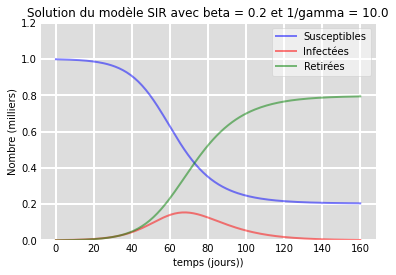

In [ ]:
# Représentation graphique en trois courbes séparées S(t), I(t) and R(t)
def graphique() :
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptibles')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectées')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Retirées ')

    ax.set_xlabel('temps (jours))')
    ax.set_ylabel('Nombre (milliers)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')

    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.title('Solution du modèle SIR avec beta = ' + str(beta) + ' et 1/gamma = ' + str(1/gamma))
        
    plt.show()

graphique()


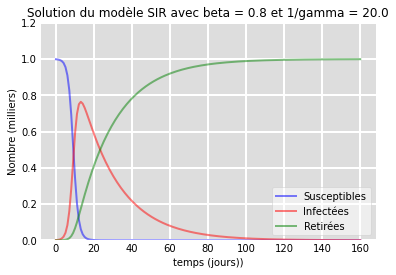

In [ ]:
# Taux d'infection par contact, beta / taux moyen de guérison, gamma, (en 1/jour).
beta = 0.8
gamma = 0.05 

# Résolution du système sur le vecteur temps.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

graphique()

## **Discrétisation et simulation**

On simule cette fois, avec représentations graphiques, la propagation épidémique.

Le $dt$ sont transformés en $\Delta t$.

Les individus sont programmés en tant qu'objets, dans une classe disposant de plusieurs méthodes.

On visualise leurs déplacements aléatoires dans un espace clôt.
Quand une personne infectée rencontre une personne suceptible, elle l'infecte avec la probabilité $\beta$.

On visualise les trois variables S, I et R.

Il est spectaculaire de constater comment la simulation est fidèle au modèle, ce qui prouve que, tout simple qu'il est, il est redoyutablement efficace !

**source :** https://github.com/towolff/SIRModelAnimation 

- Télécharger et exécuter en console le fichier :

 https://github.com/othoni-hub/ECG2/blob/main/SIR.py 

- Comprendre l'évolution de l'évolution épidémique.

- Trouver et modifier le paramètre de quarantaine et observer l'effet sur la propagation épidémique.


## **Complément**

Simulation dans un autre langage de programmation : **NetLogo**, spécialisé dans la simulation "multi-agents", il permet de s'affranchir de toute la gestion graphique.

* à télécharger ici : https://ccl.northwestern.edu/netlogo/ 

* programme de simulation à tester (auteur O.Thöni) là : https://github.com/othoni-hub/ECG2/blob/main/SIR-OT.nlogo 